In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names= ['Exam1','Exam2','Accepted'])
data.head()

,Exam1,Exam2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


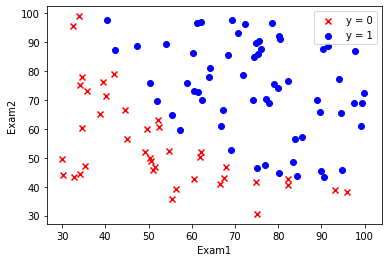

In [36]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c = 'r',marker = 'x',label = 'y = 0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c = 'b',marker = 'o',label = 'y = 1')
ax.legend()
ax.set(xlabel = 'Exam1',ylabel = 'Exam2')
plt.show()

In [37]:
data.insert(0,'ones',1)
X = data.iloc[:,0:-1]
X = np.array(X)
y = data.iloc[:,-1]
y = np.array(y)
y = y.reshape((len(X),1))
X.shape

(100, 3)

In [38]:
m = len(X)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def costFunction(X,y,theta):
    first = y * np.log(sigmoid(X@theta))
    second = (1 - y) * np.log(1 - sigmoid(X@theta))
    return - np.sum(first + second) / m
theta = np.zeros((X.shape[1],y.shape[-1]))
cost_init = costFunction(X,y,theta)
cost_init

0.6931471805599453

In [39]:
def gradientDescent(X,y,theta,alpha,iters):
    costs = []
    for i in range(iters):
        h = sigmoid(X@theta)
        h = np.array(h)
        theta = theta - X.T@(h - y) *(alpha/m)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        if i % 10000== 0:
            print(cost)
    return theta,costs
theta = np.zeros((X.shape[1],y.shape[-1]))
alpha = 0.002
iters = 200000
theta_final,costs = gradientDescent(X,y,theta,alpha,iters)
print(theta_final)
        

1.0461728387976656
0.5486316198607153
0.6633712070007592
0.920213924229649
0.619580703705487
1.1964190644678334
0.8307896383813893
0.7199311692469809
0.6192793343588466
0.529105077509339
0.4497469851545403
0.38155006138957226
0.3246718422289888
0.2791464395140832
0.26427481404323033
0.26141043977955286
0.2587657832447106
0.25631646773062705
0.2540416347072368
0.25192332731864
[[-11.97065681]
 [  0.10104137]
 [  0.09495161]]


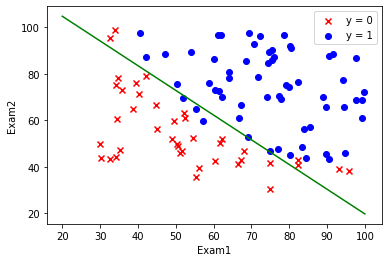

In [40]:
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam1'],data[data['Accepted']==0]['Exam2'],c = 'r',marker = 'x',label = 'y = 0')
ax.scatter(data[data['Accepted']==1]['Exam1'],data[data['Accepted']==1]['Exam2'],c = 'b',marker = 'o',label = 'y = 1')
x = np.linspace(20,100,100)
y_ = - theta_final[0,0]/theta_final[2,0]-theta_final[1,0]*x/theta_final[2,0]
ax.plot(x,y_,c= 'g')
ax.legend()
ax.set(xlabel = 'Exam1',ylabel = 'Exam2')
plt.show()

#准确率

In [43]:
def predict(X,theta):
    prob = sigmiod(X@theta)
    return [1 if x>= 0.5 else 0 for x in prob]
y_ = np.array(predict(X,theta_final))
y_pre = y_.reshape(len(y_),1)
acc = np.mean(y_pre == y)
print(acc)

NameError: name 'sigmiod' is not defined